<a href="https://colab.research.google.com/github/sauravkumarkash1/python-with-colab/blob/master/cycle_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Confusion Matrix-Evaluating the results of machine learning algorithms

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score
y_actu = [1, 1, 0, 1, 0, 0, 1, 0, 0, 0]
y_pred = [1, 0, 0, 1, 0, 0, 1, 1, 1, 0]
cm1 = confusion_matrix(y_actu, y_pred)
print(confusion_matrix(y_actu, y_pred))
print("Accuracy : ",accuracy_score(y_actu, y_pred))
print("Precision : ",precision_score(y_actu,y_pred))
print("Recall : ",recall_score(y_actu,y_pred))
sensitivity1 = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', sensitivity1 )
specificity1 = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', specificity1)


[[4 2]
 [1 3]]
Accuracy :  0.7
Precision :  0.6
Recall :  0.75
Sensitivity :  0.6666666666666666
Specificity :  0.75


Linear Regression

Estimated coefficients:
b_0 = 1.2363636363636363 
b_1 = 1.1696969696969697


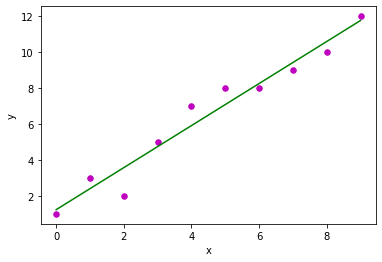

In [ ]:
import numpy as np 
import matplotlib.pyplot as plt 
  
def estimate_coef(x, y): 
    # number of observations/points 
    n = np.size(x) 
  
    # mean of x and y vector 
    m_x, m_y = np.mean(x), np.mean(y) 
  
    # calculating cross-deviation and deviation about x 
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1) 
  
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m",marker = "o", s = 30) 
  
    # predicted response vector 
    y_pred = b[0] + b[1]*x 
  
    # plotting the regression line 
    plt.plot(x, y_pred, color = "g") 
  
    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 
    # function to show plot 
    plt.show() 

# observations 
x = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]) 
y = np.array([1, 3, 2, 5, 7, 8, 8, 9, 10, 12]) 
# estimating coefficients 
b = estimate_coef(x, y) 
print("Estimated coefficients:\nb_0 = {} \nb_1 = {}".format(b[0], b[1])) 
# plotting regression line 
plot_regression_line(x, y, b)  


            
Manipulate the Twitter Data Set.  
Problems:
1.      Read the data set
2.      Remove the Twitter Handles
3.      Remove Punctuation, Numbers and Special Characters
4.      Remove words of length less than or equal to three
5.      Tokenize the Words
6.      Process Word Stemming


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
 
import pandas as pd
import numpy as np
import re
 
data=pd.read_csv("train.csv") 
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)   
    return input_txt  
print(data)
 
data['new'] = np.vectorize(remove_pattern)(data['tweet'], "@[\w]*")
print(data)
 
data['new'] = data['new'].str.replace("[^a-zA-Z#]", " ")
print(data)
 
data['new'] = data['new'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
print(data)
 
tokenized_tweet = data['new'].apply(lambda x: x.split())
print(tokenized_tweet.head())
 
from nltk.stem import PorterStemmer
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
print(tokenized_tweet.head())

          id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0  ate @user isz that youuu?ðððððð...
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]
          id  ...                                                new
0          1  ...    when a father is dysfunctional a